In [21]:
import pickle

models = {"Naive Bayes", "Logistic Regression", "Random Forest", "Decision Tree", "PassiveAggressive"}  # XGBoost can be added later

# Dictionary to store loaded models
loaded_models = {}

# Load each trained model
for model_name in models:
    file_name = f"../models/{model_name.replace(' ', '_').lower()}.pkl"  # Construct the file path
    with open(file_name, "rb") as file:
        loaded_models[model_name] = pickle.load(file)  # Store the loaded model

print("✅ Models loaded successfully!")

loaded_models

✅ Models loaded successfully!


{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Naive Bayes': MultinomialNB(),
 'PassiveAggressive': PassiveAggressiveClassifier()}

In [22]:
import pandas as pd
import re

# Load new test dataset
test_df = pd.read_csv("../data/train.csv", encoding="ISO-8859-1")

In [23]:
test_df.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [24]:
def clean_text(text):
    # Converting all text to lowercase
    text = text.lower()
    
    # Delete link/URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    
    # Delete emoji and characters non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Normalize Words
    text = re.sub(r"won\'t", "would not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "i am", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    # Remove punctuation and other symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # Delete numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Removing double spaces that may form
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
test_df['Statement'] = test_df['Statement'].apply(clean_text)

# Example usage
sample_text = "Breaking News! Fake news spreads quickly on social media."
print(clean_text(sample_text))

breaking news fake news spreads quickly on social media


In [25]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

test_df['Statement'] = test_df['Statement'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /home/vivi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vivi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/vivi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vivi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# test_df = test_df[['Statement', 'Label']]
# test_df.head()

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


/tmp/ipykernel_54626/3947724471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')


<Axes: xlabel='Label', ylabel='count'>

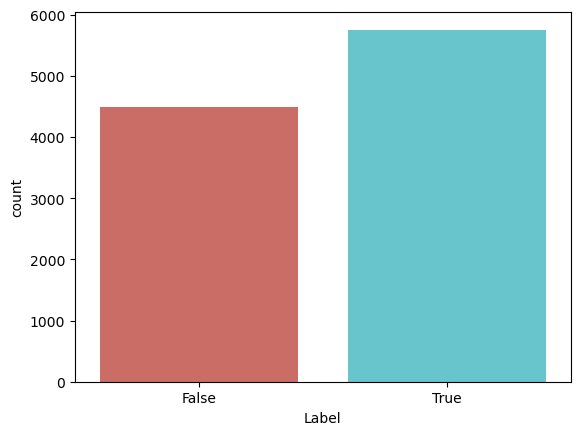

In [28]:
import seaborn as sb
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(test_df)

In [29]:
def data_qualityCheck():
    print("Checking data qualitites...")
    test_df.isnull().sum()
    test_df.info()  
    print("check finished.")
data_qualityCheck()

test_df = test_df.dropna()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [30]:
test_df.reset_index(drop= True,inplace=True)

In [31]:
test_df.shape  

(10240, 2)

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_df.Label = label_encoder.fit_transform(test_df.Label)

In [33]:
Label_test = test_df.Label

In [34]:
Label_test.head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: Label, dtype: int64

In [35]:
test_df.drop('Label', axis=1, inplace=True)

In [36]:
test_df.head()

,Statement
0,say anni list polit group support third tri am...
1,declin coal start start natur ga took start be...
2,hillari clinton agre john mccain vote give geo...
3,health care reform legisl like mandat free sex...
4,econom turnaround start end term


In [37]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [38]:
for x in range(len(test_df)) :
    corpus = []
    review = test_df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    test_df.loc[x,'Statement'] = review

In [39]:
test_df['Statement'][2188]

'say percent wisconsin employ think state head right direct major say grow compani'

In [40]:
import pickle

# Load the vectorizer
with open("../models/tfidf_vectorizer2.pkl", "rb") as file:
    vectorizer = pickle.load(file)
    
# Transform test data
vec_X_test = vectorizer.transform(test_df["Statement"])

In [41]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Dictionary to store results
model_accuracies = {}
model_conf_matrices = {}

# Load each trained model and test it
for model_name, model in loaded_models.items():
    # Get model predictions
    test_pred = model.predict(vec_X_test)  # Predict on TF-IDF test data
    
    # If model outputs probabilities (like Logistic Regression), convert to binary
    if hasattr(model, "predict_proba"):
        test_pred_prob = model.predict_proba(vec_X_test)[:, 1]
        test_pred = np.where(test_pred_prob > 0.5, 1, 0)
    
    # Compute accuracy
    accuracy = accuracy_score(Label_test, test_pred)
    model_accuracies[model_name] = accuracy
    
    # # Compute confusion matrix
    # conf_matrix = confusion_matrix(Label_test, test_pred)
    # model_conf_matrices[model_name] = conf_matrix

    print(f"{model_name} Accuracy: {round(accuracy*100,2)}")
    # print(f"\nConfusion Matrix for {model_name}:\n{conf_matrix}")


Logistic Regression Accuracy: 44.58
Decision Tree Accuracy: 44.36
Random Forest Accuracy: 43.84
Naive Bayes Accuracy: 51.04
PassiveAggressive Accuracy: 45.26


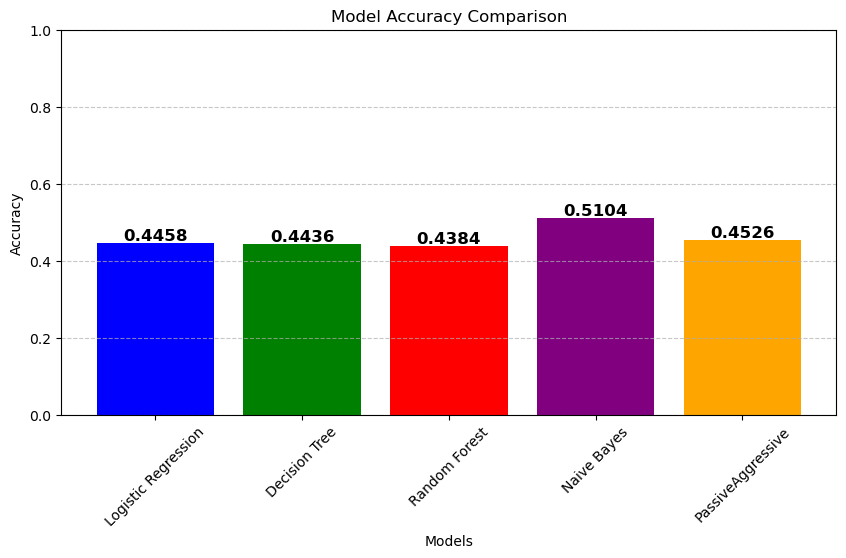

In [42]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Add accuracy values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Focus on high accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Dictionary to store results
model_accuracies = {}
model_conf_matrices = {}

# Load each trained model and test it
for model_name, model in loaded_models.items():
    # Get model predictions
    test_pred = model.predict(vec_X_test)  # Predict on TF-IDF test data
    
    # If model outputs probabilities (like Logistic Regression), convert to binary
    if hasattr(model, "predict_proba"):
        test_pred_prob = model.predict_proba(vec_X_test)[:, 1]
        test_pred = np.where(test_pred_prob > 0.5, 1, 0)
    
    # Compute accuracy
    accuracy = accuracy_score(Label_test, test_pred)
    model_accuracies[model_name] = accuracy
    
    # # Compute confusion matrix
    # conf_matrix = confusion_matrix(Label_test, test_pred)
    # model_conf_matrices[model_name] = conf_matrix

    print(f"{model_name} Accuracy: {round(accuracy*100,2)}")
    # print(f"\nConfusion Matrix for {model_name}:\n{conf_matrix}")


Logistic Regression Accuracy: 44.58
Decision Tree Accuracy: 44.36
Random Forest Accuracy: 43.84
Naive Bayes Accuracy: 51.04
PassiveAggressive Accuracy: 45.26


In [43]:
import pandas as pd

def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    # Create a DataFrame for input news
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)

    # Apply text preprocessing (Ensure 'wordopt' is defined somewhere)
    new_def_test['text'] = new_def_test["text"].apply(clean_text)  

    # Transform input using the loaded vectorizer
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)  # FIXED: Use correct transformed variable

    for model_name, model in loaded_models.items():
        # Get model predictions
        test_pred = model.predict(new_xv_test)  # FIXED: Use correct transformed variable
        
        # Print prediction correctly
        print(f"{model_name} Prediction: {output_label(test_pred[0])}")  # FIXED: Index test_pred

In [ ]:
news = str(input()) 
manual_testing(news)

Logistic Regression Prediction: Fake News
Decision Tree Prediction: Fake News
Random Forest Prediction: Fake News
Naive Bayes Prediction: Fake News
PassiveAggressive Prediction: Fake News


In [45]:
news=str(input())
manual_testing(news)

Logistic Regression Prediction: Not A Fake News
Decision Tree Prediction: Fake News
Random Forest Prediction: Fake News
Naive Bayes Prediction: Not A Fake News
PassiveAggressive Prediction: Not A Fake News
